# Average Domestic Hot Water (DHW) used per day

<div class="alert alert-success" role="alert">
    <strong>Summary:</strong><br> The first part of this notebook calculates the average DHW consumption for each apartment using the data spanning two years. It employs a one-hour resampling technique, computing the hourly mean of DWH values for each apartment. The resulting data is then visulized through plotting to observe variations and identify patterns.
</div>

Import the module needed to code

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get the data for DHW for the city of Villefontaine

The DHW files needed finishes by -IECS, we use it to get the list of the DHW data of all the apartment

In [2]:
folder = r"./DataVillefontaine/"
files = os.listdir(folder)
list_IECS = [file for file in files if '-IECS' in file]
list_IECS.sort()

Read the csv file and resample data for 10 min.

In [3]:
data = {} #Creation of a dictionary
for file in list_IECS:
    df = pd.read_csv(folder + file)
    ts = df.set_index('0')['Value']     # DataFrame -> TimeSeries
    ts.index = pd.to_datetime(ts.index, unit='s')   # index to secondes
    ts = ts.resample("10Min").mean()    # resample 10 min
    data[file[:-4]] = ts                # file name (but not .extension)

Create dataframe from the data got previously.

In [4]:
df = pd.DataFrame(data)
df = df[~df.isnull().any(axis=1)]       # Remove the row with Nan Value

Add the column 'mean'

In [5]:
df['mean'] = df.mean(axis=1)   

Conversion of the water consumption from l/s to l/h.

In [6]:
df=df*3600

In [7]:
df1h = df.resample("H").mean() #Resample the data for one hour
df1h = df1h.groupby(df1h.index.time).mean() #Work out the mean values of every values for the different hours
av = np.sum(df1h, axis=0) #Sum all the mean values of one apartment

Plot the histogram model

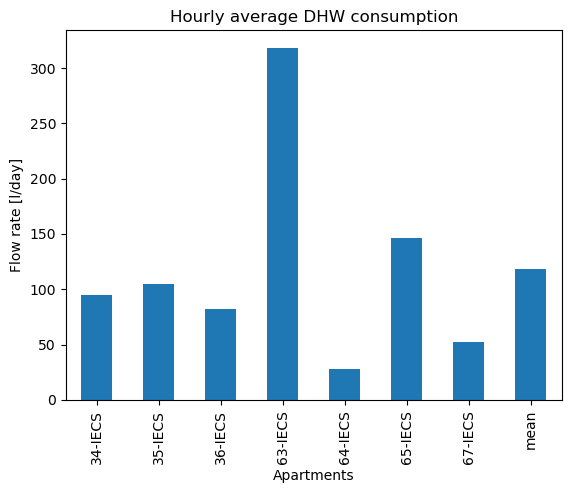

In [8]:
ax = av.plot(kind='bar', xlabel='Apartments', ylabel='Flow rate [l/day]')
ax.set_title('Hourly average DHW consumption')
plt.show()

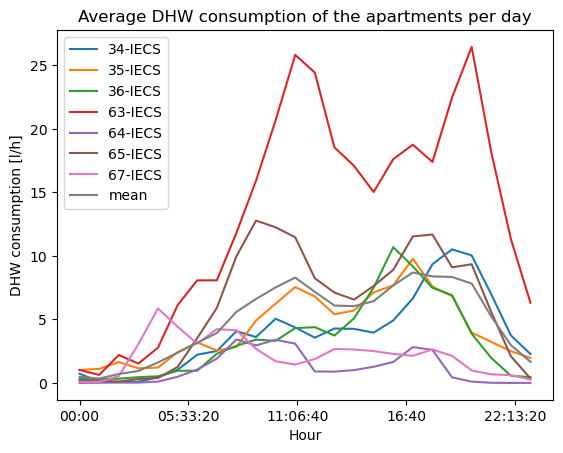

In [9]:
#Plot the linear model of the values
ac=df1h.plot(xlabel='Hour', ylabel='DHW consumption [l/h]')
ac.set_title('Average DHW consumption of the apartments per day')
plt.show()

# Average electrical consumption of the apartments of the city of Villefontaine


<div class="alert alert-success" role="alert">
    <strong>Summary:</strong><br> The second part of the notebook calculates the average electrical consumption for each apartment using the data spanning two years. It employs a one-hour resampling technique, computing the hourly mean of electrical values for each apartment. The resulting data is then visulized through plotting to observe variations.
</div>

## Get the data from files for electrical consumption for the city of Villefontaine
The files" title finishes by -EC for domestic hot water for the city of Villefontaine

In [10]:
list_EC = [file for file in files if '-EC' in file]
list_EC.sort()

Read the csv file and resample the data for 10 min.

In [11]:
dataBis = {} #Creation of a dictionary
for file in list_EC:
    df = pd.read_csv(folder + file)
    ts = df.set_index('0')['Value']     # DataFrame -> TimeSeries
    ts.index = pd.to_datetime(ts.index, unit='s')   # index to secondes
    ts = ts.resample("10Min").mean()    # resample 10 min
    dataBis[file[:-4]] = ts                # file name 

Create dataframe from the data got previously.

In [12]:
df1 = pd.DataFrame(dataBis)
df1 = df1[~df1.isnull().any(axis=1)]       # Remove the row with Nan Value

Add the column 'mean'

In [13]:
df1['mean'] = df1.mean(axis=1)   

Resample the data for one hour and then work out the mean hourly-values of each apartment

In [14]:
df2h = df1.resample("H").mean() #Resample the data for one hour
df2h = df2h.groupby(df2h.index.time).mean() #Work out the mean values of every values for the different hours
av1 = np.sum(df2h, axis=0) #Sum all the mean values of one apartment

Plot the histogram diagram

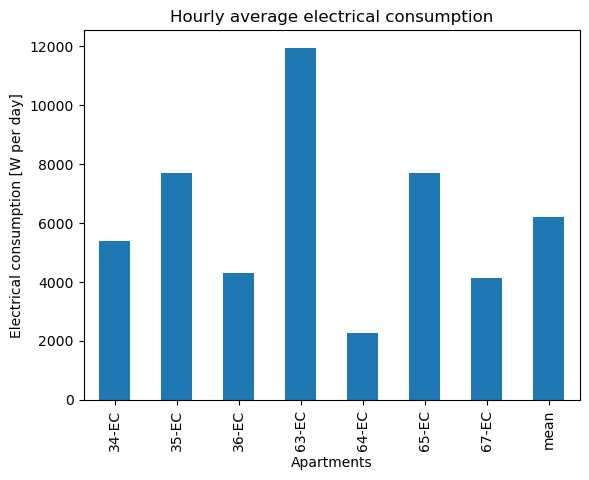

In [17]:
ax1= av1.plot(kind='bar', xlabel='Apartments', ylabel='Electrical consumption [W per day]')
ax1.set_title('Hourly average electrical consumption')
plt.show()

Plot the linear model of the values

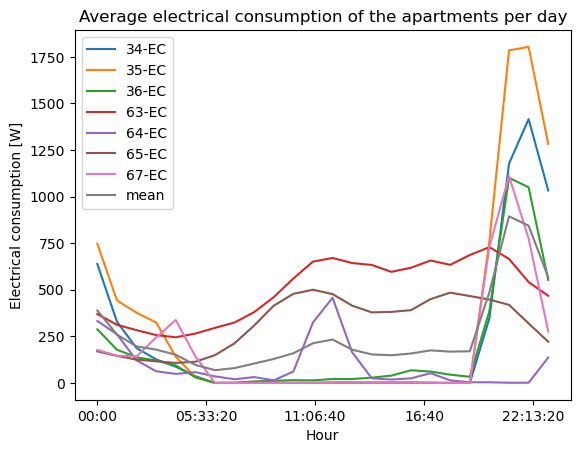

In [19]:
ac1=df2h.plot(xlabel='Hour', ylabel='Electrical consumption [W]')
ac1.set_title('Average electrical consumption of the apartments per day')
plt.show()